**Programming Assignment 2 - LINEAR REGRESSION**

Ma. Charina O. Gavica <br>
Ma. Cristina F. Jara <br>
Khryzelle Trisha L. Suyat

EMTECH-BATCHSAWA


##ALL DATA CODES

Data Splitting for Training, Validation, and Testing

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

pandas for data manipulation, NumPy for numerical operations, and Seaborn and Matplotlib for data visualization.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/EMTECH_YATSU/ASS#2/energy+efficiency/ENB2012_data.xlsx')


Mounted at /content/drive


In [3]:
print(f'Length:     {len(df)}')
print(f'Dimensions: {df.shape}')
print(f'Missing:    {df.isnull().sum().sum()}')
print(f'Features:   {df.shape[1] - 2}')  # Assuming last two columns are targets
print(f'Labels:     2')  # Assuming there are two target/label columns


Length:     768
Dimensions: (768, 10)
Missing:    0
Features:   8
Labels:     2


This section prints basic information about the dataset:
Number of rows (length),

*   Number of dimensions (rows and columns),
*   Missing values, and
*   Assumed number of features and labels (2 labels: Y1 and Y2).

In [4]:
target_columns = ['Y1', 'Y2']
descriptions = [
    "Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
    "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution",
    "Heating Load", "Cooling Load"
]


In [5]:
metadata = pd.DataFrame({
    'name': df.columns,
    'role': ['Feature' if col not in target_columns else 'Target' for col in df.columns],
    'type': ['Continuous' if df[col].dtype in [np.float64, np.float32] else 'Integer' for col in df.columns],
    'description': descriptions
})

from IPython.display import display
print("\nMetadata:")
display(metadata)



Metadata:


,name,role,type,description
0,X1,Feature,Continuous,Relative Compactness
1,X2,Feature,Continuous,Surface Area
2,X3,Feature,Continuous,Wall Area
3,X4,Feature,Continuous,Roof Area
4,X5,Feature,Continuous,Overall Height
5,X6,Feature,Integer,Orientation
6,X7,Feature,Continuous,Glazing Area
7,X8,Feature,Integer,Glazing Area Distribution
8,Y1,Target,Continuous,Heating Load
9,Y2,Target,Continuous,Cooling Load


This creates a metadata DataFrame that includes column names, roles (feature or target), data types (continuous or integer), and descriptions. This helps better understand the structure and role of each column.

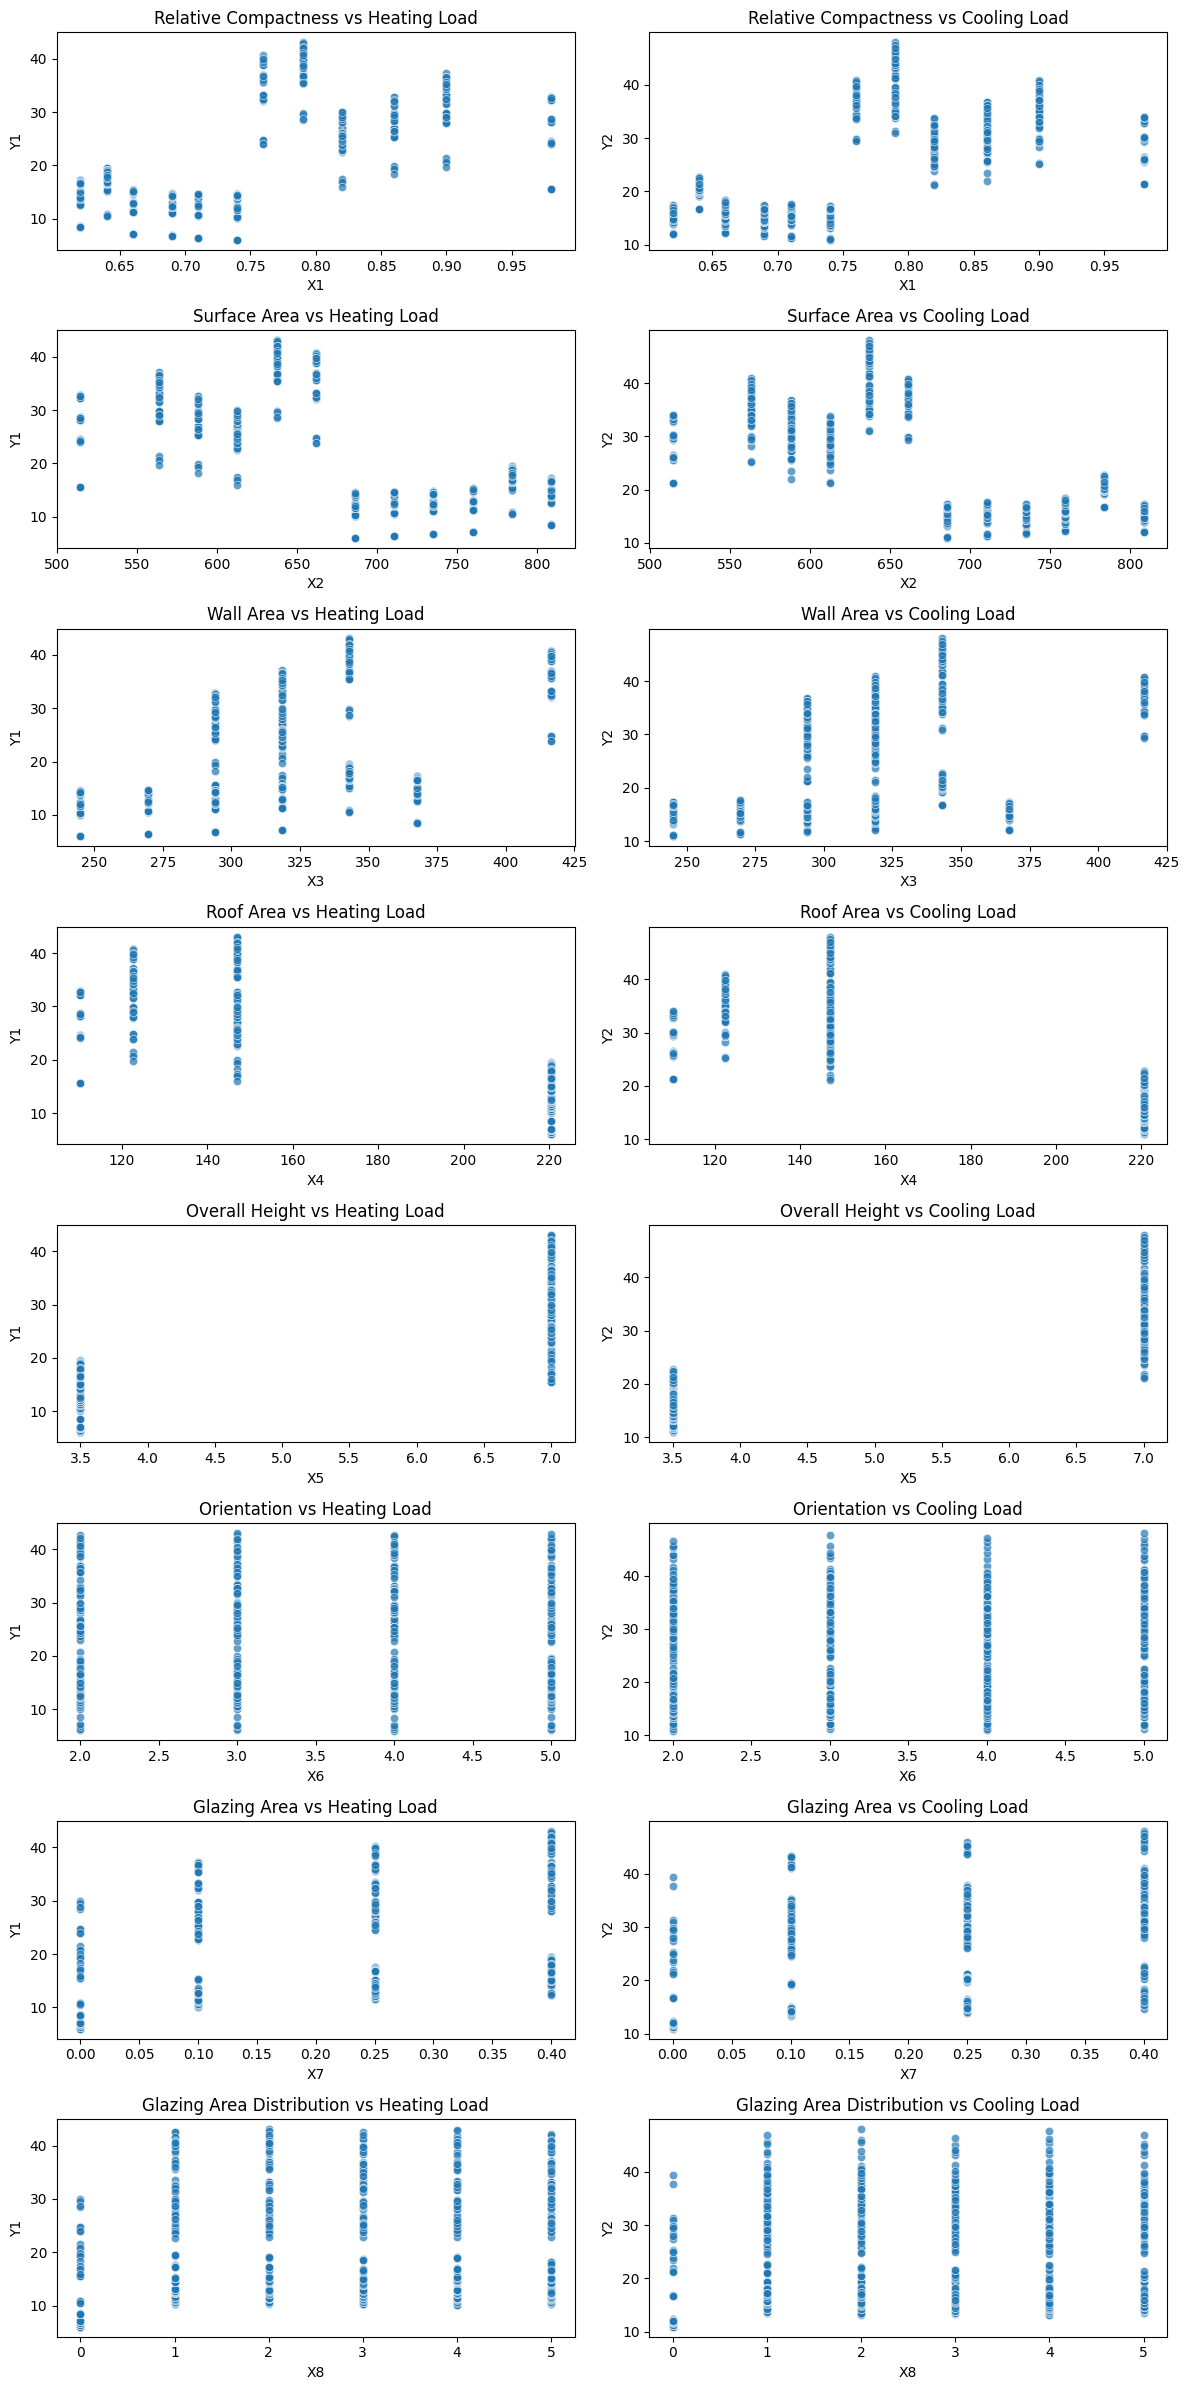

In [6]:
fig, axes = plt.subplots(8, 2, figsize=(12, 24))

for i in range(8):
    feature = f'X{i+1}'
    feature_name = metadata.loc[metadata['name'] == feature, 'description'].values[0]

    sns.scatterplot(data=df, x=feature, y='Y1', ax=axes[i, 0], alpha=0.7)
    axes[i, 0].set_title(f'{feature_name} vs Heating Load')

    sns.scatterplot(data=df, x=feature, y='Y2', ax=axes[i, 1], alpha=0.7)
    axes[i, 1].set_title(f'{feature_name} vs Cooling Load')

plt.tight_layout()
plt.show()


A grid of scatter plots is created to show the relationship between each feature (X1 to X8) and the target variables (Y1 - Heating Load and Y2 - Cooling Load). This provides visual insights into how each feature impacts the target.

In [9]:
x = df.iloc[:, :8]  # Features
y = df['Y1']  # Target: Heating Load (Y1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=69)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=420)

print(f"Training size: {len(x_train)}")
print(f"Validation size: {len(x_val)}")
print(f"Test size: {len(y_test)}")


Training size: 460
Validation size: 154
Test size: 154


This section splits the data:
* 60% for training,
* 40% for testing, which is further split into 20% validation and 20% testing. These splits ensure that the model can be trained and evaluated on different sets of data to avoid overfitting.

In [11]:
def ridge_lr(alpha, training_features=x_train, training_labels=y_train, test_features=x_val):
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(training_features, training_labels)
    predictions = model_ridge.predict(test_features)
    return predictions, model_ridge

def eval_lr(y_true, predictions: list, names=[""]):
    r2s, mses, rmses, nmses = [], [], [], []
    for prediction in predictions:
        r2 = r2_score(y_true, prediction)
        mse = mean_squared_error(y_true, prediction)
        rmse = np.sqrt(mse)
        nmse = mse / np.var(y_true)

        r2s.append(r2)
        mses.append(mse)
        rmses.append(rmse)
        nmses.append(nmse)

    results = pd.DataFrame({
        "r2": r2s,
        "mse": mses,
        "rmse": rmses,
        "nmse": nmses
    }, index=names)

    return results


This function builds and trains a Ridge Regression model using the given alpha (regularization strength). It predicts target values for the validation set and evaluates the model using metrics like r2, mse, rmse, and nmse. The evaluation results are returned in a DataFrame.

                      r2        mse      rmse      nmse
alpha=0.0001    0.926392   7.484246  2.735735  0.073608
alpha=0.001     0.926373   7.486114  2.736076  0.073627
alpha=0.01      0.926113   7.512634  2.740919  0.073887
alpha=0.1       0.923998   7.727636  2.779863  0.076002
alpha=1.0       0.922025   7.928203  2.815707  0.077975
alpha=10.0      0.905132   9.645832  3.105774  0.094868
alpha=100.0     0.860443  14.189727  3.766925  0.139557
alpha=1000.0    0.828971  17.389706  4.170097  0.171029
alpha=10000.0   0.817970  18.508235  4.302120  0.182030
alpha=100000.0  0.812748  19.039209  4.363394  0.187252


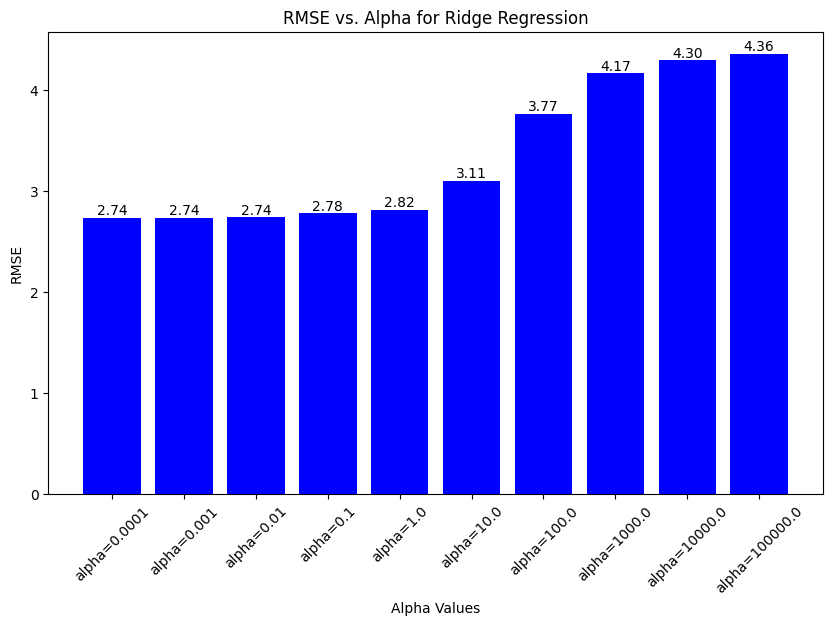

In [14]:
# Test different alpha values for Ridge regression
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]

# Store predictions for each alpha value
predictions = []
for alpha in alphas:
    prediction, _ = ridge_lr(alpha)
    predictions.append(prediction)

# Evaluate the predictions against the validation set (y_val)
results = eval_lr(y_val, predictions, names=[f"alpha={alpha}" for alpha in alphas])
print(results)

# Plot the RMSE for each alpha value as a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(results.index, results.rmse, color='b')  # Use bar plot instead of line plot
plt.xticks(rotation=45)
plt.xlabel('Alpha Values')
plt.ylabel('RMSE')
plt.title('RMSE vs. Alpha for Ridge Regression')

# Remove gridlines and plot
plt.grid(False)


# Display RMSE values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()


This section creates a bar plot to visualize the RMSE values for different alpha values. The spines (axes borders) and the gridlines are removed to make the plot cleaner. This visual helps in selecting the best alpha based on RMSE.

In [15]:
predictions, model = ridge_lr(1e-2, test_features=x_test)
results = eval_lr(y_test, [predictions])
print(results)

coefficients = np.argsort(np.abs(model.coef_))[::-1]
features = [f"X{i+1}: {round(model.coef_[i], 2)}" for i in coefficients]

print("\nModel parameters (sorted by importance):")
for feature in features:
    print(feature)
print(f"Intercept: {round(model.intercept_, 2)}")


        r2       mse      rmse      nmse
  0.920539  8.166726  2.857748  0.079461

Model parameters (sorted by importance):
X1: -47.5
X7: 20.51
X5: 4.68
X8: 0.34
X6: -0.1
X2: -0.04
X4: -0.04
X3: 0.04
Intercept: 50.36


In [16]:
top_5 = np.argsort(np.abs(model.coef_))[::-1][:5]
top_5_names = [f"X{i+1}" for i in top_5]
top_5_features = [f"{name}: {round(model.coef_[coef], 2)}" for name, coef in zip(top_5_names, top_5)]

print("\nTop 5 parameters:")
for feature in top_5_features:
    print(feature)

nx = df[top_5_names]
ny = df['Y1']

nx_train, nx_test, ny_train, ny_test = train_test_split(nx, ny, test_size=0.4, random_state=69)
nx_val, nx_test, ny_val, ny_test = train_test_split(nx_test, ny_test, test_size=0.5, random_state=420)



Top 5 parameters:
X1: -47.5
X7: 20.51
X5: 4.68
X8: 0.34
X6: -0.1


Sorts the model's coefficients by importance (absolute value), selects the top 5 features, and prints their names and coefficients.

                r2         mse       rmse      nmse
0.0001    0.919049    8.230844   2.868945  0.080951
0.001     0.919045    8.231271   2.869019  0.080955
0.01      0.919002    8.235658   2.869784  0.080998
0.1       0.918470    8.289755   2.879193  0.081530
1.0       0.909559    9.195736   3.032447  0.090441
10.0      0.861265   14.106119   3.755811  0.138735
100.0     0.810652   19.252349   4.387750  0.189348
1000.0    0.656651   34.910589   5.908518  0.343349
10000.0   0.168574   84.536711   9.194385  0.831426
100000.0  0.003924  101.277857  10.063690  0.996076


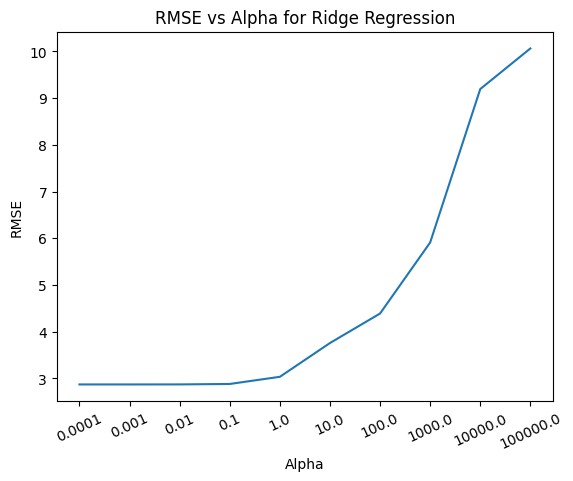

In [17]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
predictions = []
for alpha in alphas:
    prediction, _ = ridge_lr(alpha, training_features=nx_train, training_labels=ny_train, test_features=nx_val)
    predictions.append(prediction)

results = eval_lr(ny_val, predictions, names=[f"{alpha}" for alpha in alphas])
print(results)

plt.xticks(rotation=25)
plt.plot(results.rmse)
plt.title("RMSE vs Alpha for Ridge Regression")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.show()


Alpha values ranging from 1e-4 to 1e-5 are tested. For every value, ridge regression is carried out using the training set, and predictions are produced for the validation set. Metrics such as RMSE are used to assess the models. To illustrate how performance changes with regularization, an RMSE vs. Alpha figure is created.

In [18]:
predictions = []
for test_feature in [nx_val, nx_test]:
    prediction, _ = ridge_lr(alpha=1e-4, training_features=nx_train, training_labels=ny_train, test_features=test_feature)
    predictions.append(prediction)

test_labels = [ny_val, ny_test]
names = ['Validation', 'Test']

for ix, test_label in enumerate(test_labels):
    print(f"\nEvaluation on {names[ix]} set:")
    print(eval_lr(test_label, [predictions[ix]], [names[ix]]))



Evaluation on Validation set:
                  r2       mse      rmse      nmse
Validation  0.919049  8.230844  2.868945  0.080951

Evaluation on Test set:
            r2       mse      rmse      nmse
Test  0.907584  9.498241  3.081922  0.092416


## GUIDE QUESTION


**What is the impact of removing certain features on the model’s performance?**
<br>The model performs worse when specific characteristics are eliminated. This makes sense because a simpler model is frequently produced by employing fewer vital parts. As a result, less regularization is required than training with every feature. The model loses information that may not be essential but improves prediction accuracy when certain features are eliminated. High-dimensional input features are possible in deep learning and large-scale machine learning. Reducing features speeds up inference and training by lowering dimensionality.<br>

**Why is it necessary to split the data into training, validation, and testing sets? What could happen if this step is skipped?**
<br>To ensure a model can handle new data well, the data is split into training, validation, and testing sets. If this isn't done, the model might memorize the test data, leading to overfitting and poor real-world performance. The training set helps the model learn patterns, the validation set is used to fine-tune it, and the test set checks how well it works on new, unseen data. Testing on new data prevents bias and helps ensure the model performs well outside the data it was trained on.<br>

**How can the generalization ability of the model be assessed using the test data? What steps would you take to ensure the model generalizes well to unseen data?**
<br> Test data shows if the model generalizes well or is overfitted. Ensuring proper model complexity, using cross-validation, and applying regularization techniques like L2/L1 regression and dropout improve generalization by preventing overfitting.<br>
